# **State-Level Analysis of Health Issues, Hospital Availability, and Healthcare Quality in the U.S.**

#### Team 10: Suji Kim, Anna Baldzikowski, Linh Le, Shi Qiu, Tianqi Sun, Xiaoyan Wang

## **Executive Summary**
As the U.S. population ages, ensuring that older adults have equitable access to high-quality healthcare has become an urgent priority. Integrating health, hospital, and nursing home rating data from the CDC, the U.S. Government Works, and CMS, this project analyzes state/region-level patterns in access, quality, and health status across the United States. We aim to provide strategic insights for policymakers and providers to improve resource allocation and patient outcomes.

Key findings include that states such as Texas and Ohio show high accessibility, with more long-term care hospitals per elderly population, yet this does not always correspond to better service quality. A regression model (R² = 0.909) identified Quality Measure (QM) as the strongest predictor of overall nursing home performance, suggesting that care quality relies more on operations than facility count. In high-performing states, 76.5-81.7% of older adults report good or excellent health, with 8.3-10.6% experiencing frequent mental distress. In contrast, low-performing states show 69.7-77.7% good or excellent health and 9.2-13.4% distress. Regionally, the South has the largest hospital network (>2,000 facilities) and cholesterol screening rates above 94%, while the Northeast has fewer hospitals and the rural West shows the lowest screening rates.

Overall, this study visualized key health indicators through diverse charts and maps (box plots, linear regression scatter plots, and Choropleth maps), revealing the need to balance quantitative expansion with qualitative management of healthcare infrastructure. These insights emphasize that improving both capacity and service quality is essential for promoting healthier aging and effective policy prioritization nationwide.

## **Problem Definition**

This project aims to analyze the relationships between health challenges and healthcare infrastructure across U.S. states in the context of health-related reports for the elderly population. We will:
* Identify the most relevant health issues in each state.
* Assess elderly hospital accessibility by counting hospitals per population by state.
* Evaluate average nursing home quality ratings per state.
* Explore correlations between state-level health problems and healthcare facility ratings.
* This will help policymakers and healthcare providers make data-informed decisions to balance the quantitative expansion and qualitative management of healthcare infrastructure, ultimately improving access and outcomes for older adults.

## **1. Introduction**

#### **1.1 Motivation**

By combining health, hospital, and rating data, this project provides insights into whether states with greater health challenges face gaps in access or care quality. The findings may inform policymakers, healthcare providers, and business analysts on how to improve resource allocation and patient outcomes nationwide.

#### **1.2 Data Source**

* **Alzheimer’s Disease and Healthy Aging Data**
  - **Description**: Data including health issues, residence, age (adults over middle age), etc. of elderly living in the United States
  - **License**: CDC (BRFSS-based, Public Domain)
  - **Access**: [Link](https://data.cdc.gov/Healthy-Aging/Alzheimer-s-Disease-and-Healthy-Aging-Data/hfr9-rurv/about_data) (CSV, 138.4 MB)

* **USA Hospitals**
  - **Description**: Data including the names, types, locations, etc. of hospitals in the United States
  - **License:** U.S. Government Works (Public Domain)
  - **Access:** [Link](https://www.kaggle.com/datasets/carlosaguayo/usa-hospitals) (CSV, 3.7 MB)  


* **State US Averages**
  - **Description**: Data including various type of ratings of nursing homes in the United States by state
  - **License:** CMS (Public domain U.S. government data)
  - **Access:** [Link](https://data.cms.gov/provider-data/dataset/xcdc-v8bm) (CSV, 23 KB)  


## **2. Data Cleaning**

#### **2.1 Libraries**

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.formula.api as smf
from scipy.stats import linregress
from plotly.subplots import make_subplots
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression

import plotly.io as pio
pio.renderers.default = 'colab'

#### **2.2 Data Import**

In [9]:
import requests, io, zipfile

HEALTH_URL = 'https://raw.githubusercontent.com/CrazyThursV50/BA780_b10_Health_Analysis/main/Health.csv.zip'
HOSP_URL = 'https://raw.githubusercontent.com/CrazyThursV50/BA780_b10_Health_Analysis/main/Hospitals.csv'
RATINGS_URL = 'https://raw.githubusercontent.com/CrazyThursV50/BA780_b10_Health_Analysis/main/Ratings.csv'
r = requests.get(HEALTH_URL)
z = zipfile.ZipFile(io.BytesIO(r.content))

with z.open('Health.csv') as f:
  health = pd.read_csv(f)

# health = pd.read_csv(HEALTH_URL)
hospital = pd.read_csv(HOSP_URL)
rating = pd.read_csv(RATINGS_URL)

#### **2.3 Data Basic Information**

In [10]:
health.head(5)

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,BRFSS~2015~2015~66~Q35~TOC03~AGE~SEX,2015,2015,GU,Guam,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,Number,...,Female,POINT (144.793731 13.444304),C01,TOC03,Q35,66,AGE,AGE_OVERALL,SEX,FEMALE
1,BRFSS~2015~2015~25~Q27~TMC03~AGE~SEX,2015,2015,MA,Massachusetts,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,...,Male,POINT (-72.08269067499964 42.27687047000046),C05,TMC03,Q27,25,AGE,65PLUS,SEX,MALE
2,BRFSS~2015~2015~9002~Q43~TOC11~AGE~SEX,2015,2015,MDW,Midwest,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,...,Male,NaN,C01,TOC11,Q43,9002,AGE,5064,SEX,MALE
3,BRFSS~2015~2015~27~Q03~TMC01~AGE~SEX,2015,2015,MN,Minnesota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-94.79420050299967 46.35564873600049),C05,TMC01,Q03,27,AGE,AGE_OVERALL,SEX,MALE
4,BRFSS~2015~2015~29~Q43~TOC11~AGE~OVERALL,2015,2015,MO,Missouri,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,...,NaN,POINT (-92.56630005299968 38.635790776000476),C01,TOC11,Q43,29,AGE,AGE_OVERALL,OVERALL,OVERALL


In [11]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284142 entries, 0 to 284141
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RowId                       284142 non-null  object 
 1   YearStart                   284142 non-null  int64  
 2   YearEnd                     284142 non-null  int64  
 3   LocationAbbr                284142 non-null  object 
 4   LocationDesc                284142 non-null  object 
 5   Datasource                  284142 non-null  object 
 6   Class                       284142 non-null  object 
 7   Topic                       284142 non-null  object 
 8   Question                    284142 non-null  object 
 9   Data_Value_Unit             284142 non-null  object 
 10  DataValueTypeID             284142 non-null  object 
 11  Data_Value_Type             284142 non-null  object 
 12  Data_Value                  192808 non-null  float64
 13  Data_Value_Alt

In [12]:
health.describe()

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID
count,284142.000000,284142.000000,192808.000000,192808.000000,192597.000000,192597.000000,284142.000000
mean,2018.596065,2018.657735,37.676757,37.676757,33.027824,42.595333,800.322677
std,2.302815,2.360105,25.213484,25.213484,24.290016,26.156408,2511.564977
min,2015.000000,2015.000000,0.000000,0.000000,-0.700000,1.300000,1.000000
25%,2017.000000,2017.000000,15.900000,15.900000,12.600000,19.700000,19.000000
50%,2019.000000,2019.000000,32.800000,32.800000,27.000000,38.900000,34.000000
75%,2021.000000,2021.000000,56.900000,56.900000,49.400000,64.600000,49.000000
max,2022.000000,2022.000000,100.000000,100.000000,99.600000,100.000000,9004.000000


In [13]:
hospital.head(5)

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
0,-94.945477,29.747620,8497,76777520,HOUSTON METHODIST SAN JACINTO HOSPITAL ALEXAND...,1700 JAMES BOWIE DRIVE,BAYTOWN,TX,77520,NOT AVAILABLE,...,2017-12-18T00:00:00.000Z,http://www.houstonmethodist.org/locations/san-...,NOT AVAILABLE,NOT AVAILABLE,48.0,NON-PROFIT,-999.0,182.0,NOT AVAILABLE,Y
1,-82.881843,40.027143,8498,129043230,"WOODS AT PARKSIDE,THE",349 OLDE RIDENOUR ROAD,COLUMBUS,OH,43230,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,http://www.thewoodsatparkside.com/,1815,NOT AVAILABLE,39.0,PROPRIETARY,-999.0,50.0,NOT AVAILABLE,NOT AVAILABLE
2,-84.168027,39.774242,8499,130045404,DAYTON CHILDREN'S HOSPITAL,ONE CHILDRENS PLAZA,DAYTON,OH,45404,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,http://www.childrensdayton.org/cms/home/index....,1411,NOT AVAILABLE,39.0,NON-PROFIT,-999.0,155.0,PEDIATRIC LEVEL II,Y
3,-80.632972,41.005169,8500,128844512,VIBRA HOSPITAL OF MAHONING VALLEY,8049 SOUTH AVENUE,BOARDMAN,OH,44512,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,http://www.mahoningvalleyhospital.com/,1428,MAHONING VALLEY HOSPITAL BOARDMAN CAMPUS,39.0,PROPRIETARY,-999.0,45.0,NOT AVAILABLE,NOT AVAILABLE
4,-84.199398,39.747740,8501,129845417,HAVEN BEHAVIORAL SENIOR CARE OF DAYTON,"ONE ELIZABETH PLACE,E3 SUITE A",DAYTON,OH,45417,NOT AVAILABLE,...,2018-04-26T00:00:00.000Z,https://dayton.havenbehavioral.com/,1506,NOT AVAILABLE,39.0,PROPRIETARY,-999.0,32.0,NOT AVAILABLE,NOT AVAILABLE


In [14]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           7570 non-null   float64
 1   Y           7570 non-null   float64
 2   OBJECTID    7570 non-null   int64  
 3   ID          7570 non-null   int64  
 4   NAME        7570 non-null   object 
 5   ADDRESS     7570 non-null   object 
 6   CITY        7570 non-null   object 
 7   STATE       7570 non-null   object 
 8   ZIP         7570 non-null   int64  
 9   ZIP4        7570 non-null   object 
 10  TELEPHONE   7570 non-null   object 
 11  TYPE        7570 non-null   object 
 12  STATUS      7570 non-null   object 
 13  POPULATION  7570 non-null   int64  
 14  COUNTY      7570 non-null   object 
 15  COUNTYFIPS  7570 non-null   object 
 16  COUNTRY     7570 non-null   object 
 17  LATITUDE    7570 non-null   float64
 18  LONGITUDE   7570 non-null   float64
 19  NAICS_CODE  7570 non-null  

In [15]:
hospital.describe()

,X,Y,OBJECTID,ID,ZIP,POPULATION,LATITUDE,LONGITUDE,NAICS_CODE,ST_FIPS,TTL_STAFF,BEDS
count,7570.000000,7570.000000,7570.000000,7.570000e+03,7570.000000,7570.000000,7570.000000,7570.000000,7570.000000,7569.000000,7569.0,7569.000000
mean,-92.387417,37.331745,11287.911889,2.520163e+07,53609.916645,42.392999,37.331744,-92.387417,622140.951123,29.472189,-999.0,48.257233
std,15.995659,5.775099,2189.726558,3.899382e+07,27518.769850,370.336773,5.775099,15.995660,66.107596,16.304241,0.0,362.645616
min,-176.640263,-14.290242,7497.000000,4.000000e+00,605.000000,-999.000000,-14.290242,-176.640263,622110.000000,1.000000,-999.0,-999.000000
25%,-98.199507,33.463963,9392.250000,3.974885e+06,32028.000000,25.000000,33.463963,-98.199507,622110.000000,17.000000,-999.0,25.000000
50%,-90.074141,37.976913,11288.000000,9.640840e+06,54966.000000,65.000000,37.976913,-90.074141,622110.000000,29.000000,-999.0,66.000000
75%,-81.774617,41.322441,13183.750000,2.241059e+07,76781.000000,178.000000,41.322441,-81.774617,622110.000000,44.000000,-999.0,178.000000
max,145.724472,71.292847,15081.000000,1.676842e+08,99929.000000,1592.000000,71.292847,145.724472,622310.000000,78.000000,-999.0,1592.000000


In [16]:
rating.head(5)

,State or Nation,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,Cycle 1 Total Number of Health Deficiencies,Cycle 1 Total Number of Fire Safety Deficiencies,Cycle 2 Total Number of Health Deficiencies,Cycle 2 Total Number of Fire Safety Deficiencies,Cycle 3 Total Number of Health Deficiencies,...,Percentage of long stay residents who received an antianxiety or hypnotic medication,Percentage of long stay residents assessed and appropriately given the seasonal influenza vaccine,Percentage of short stay residents who were assessed and appropriately given the seasonal influenza vaccine,Percentage of long stay residents with pressure ulcers,Percentage of long stay residents with new or worsened bowel or bladder incontinence,Percentage of short stay residents who were rehospitalized after a nursing home admission,Percentage of short stay residents who had an outpatient emergency department visit,Number of hospitalizations per 1000 long-stay resident days,Number of outpatient emergency department visits per 1000 long-stay resident days,Processing Date
0,NATION,2.9,2.8,3.4,2.8,9.5,4.8,9.5,4.7,8.9,...,19.863853,95.259200,78.988659,5.405217,20.688110,23.350053,11.972015,1.832428,1.781678,2025-07-01
1,AK,3.6,2.9,3.9,4.4,7.6,4.6,8.2,5.7,9.8,...,15.827222,96.001753,84.651014,6.673912,21.480154,11.743870,10.213621,1.119109,1.536394,2025-07-01
2,AL,2.9,2.8,2.9,3.5,3.6,3.4,2.8,3.4,3.8,...,24.945932,94.926441,79.984144,6.133246,13.766255,24.557593,11.921094,1.867298,1.798315,2025-07-01
3,AR,3.0,2.8,3.6,3.1,6.5,1.9,8.2,2.1,8.7,...,22.218239,94.982790,74.881084,5.127084,15.894330,24.713507,14.027711,2.006870,2.212048,2025-07-01
4,AZ,3.4,2.8,4.5,3.0,6.8,0.6,7.0,2.5,8.4,...,20.754586,95.274530,87.434934,5.316849,21.548023,23.889545,10.808566,1.815069,1.559910,2025-07-01


In [17]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 51 columns):
 #   Column                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                       --------------  -----  
 0   State or Nation                                                                                              54 non-null     object 
 1   Overall Rating                                                                                               54 non-null     float64
 2   Health Inspection Rating                                                                                     54 non-null     float64
 3   QM Rating                                                                                                    52 non-null     float64
 4   Staffing Rating                                                 

In [18]:
rating.describe()

,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,Cycle 1 Total Number of Health Deficiencies,Cycle 1 Total Number of Fire Safety Deficiencies,Cycle 2 Total Number of Health Deficiencies,Cycle 2 Total Number of Fire Safety Deficiencies,Cycle 3 Total Number of Health Deficiencies,Cycle 3 Total Number of Fire Safety Deficiencies,...,Percentage of long stay residents whose ability to walk independently worsened,Percentage of long stay residents who received an antianxiety or hypnotic medication,Percentage of long stay residents assessed and appropriately given the seasonal influenza vaccine,Percentage of short stay residents who were assessed and appropriately given the seasonal influenza vaccine,Percentage of long stay residents with pressure ulcers,Percentage of long stay residents with new or worsened bowel or bladder incontinence,Percentage of short stay residents who were rehospitalized after a nursing home admission,Percentage of short stay residents who had an outpatient emergency department visit,Number of hospitalizations per 1000 long-stay resident days,Number of outpatient emergency department visits per 1000 long-stay resident days
count,54.000000,54.000000,52.000000,54.000000,54.00000,54.000000,54.000000,54.000000,54.000000,53.000000,...,52.000000,53.000000,52.000000,53.000000,53.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,2.935185,2.798148,3.359615,3.114815,9.72037,4.350000,9.466667,4.524074,9.038889,4.149057,...,21.443149,18.910373,95.181414,78.542038,5.682258,22.030751,22.154616,12.379626,1.678745,1.820969
std,0.282280,0.122074,0.596808,0.580308,4.39963,2.709853,3.844918,3.139339,3.708095,2.525685,...,4.259390,5.185674,1.987822,7.281006,1.761901,3.998841,2.941549,2.254109,0.347695,0.463673
min,2.000000,2.000000,2.000000,2.100000,3.60000,0.500000,2.800000,0.500000,3.800000,0.500000,...,10.442879,4.000000,89.793057,62.004335,3.813748,11.759753,11.743870,6.078424,0.990666,0.648888
25%,2.800000,2.800000,2.900000,2.700000,6.57500,2.225000,7.025000,2.400000,6.725000,2.000000,...,18.974755,16.117200,93.946071,75.191384,4.738683,20.323351,20.463343,10.923778,1.407059,1.510208
50%,3.000000,2.800000,3.300000,3.100000,9.00000,4.150000,8.750000,4.350000,8.600000,3.700000,...,21.585023,18.934913,95.138574,78.981805,5.405217,22.497214,22.304879,12.256457,1.672144,1.812492
75%,3.100000,2.800000,3.900000,3.475000,11.52500,5.875000,12.225000,5.775000,11.225000,5.800000,...,24.236633,21.883578,96.411461,81.718279,6.169651,25.115985,24.363558,13.733942,1.958936,2.128227
max,3.600000,3.000000,4.500000,4.400000,27.70000,12.000000,20.200000,18.500000,20.000000,11.700000,...,33.444312,32.441115,99.184604,98.427344,16.190057,30.018138,26.987767,18.212484,2.554254,2.869324


#### **2.4 Data Cleaning**


The three datasets share a common column with state codes. However, they are expressed differently, as shown below. We have organized them to unify them.

* **health**: 50 states + DC + US territories (PR, GU, VI) + {US, MDW, NRE, SOU, WEST}
* **hospital**: 50 states + DC + US territories (PR, GU, MP, AS, VI) + (currently independent country) PW
* **rating**: 50 states + DC + US territories (PR, GU)

In [19]:
health = health.rename(columns = {"LocationAbbr": "StateCode"})
hospital = hospital.rename(columns = {"STATE": "StateCode"})
rating = rating.rename(columns = {"State or Nation": "StateCode"})
rating["StateCode"] = rating["StateCode"].replace({"NATION": "US"})

states = {
    'AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA',
    'HI','ID','IL','IN','IA','KS','KY','LA','ME','MD',
    'MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ',
    'NM','NY','NC','ND','OH','OK','OR','PA','RI','SC',
    'SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'
}
special = {'DC'}
territories = {'PR','GU','VI'}
regions = {
    "NRE": {"ME","NH","VT","MA","RI","CT","NY","NJ","PA"},
    "MDW": {"OH","IN","IL","MI","WI","MN","IA","MO","ND","SD","NE","KS"},
    "SOU": {"DE","MD","DC","VA","WV","NC","SC","GA","FL",
            "KY","TN","AL","MS","AR","LA","OK","TX"},
    "WEST": {"MT","ID","WY","NV","UT","CO","AZ","NM","AK","WA","OR","CA","HI"}
}
aggregate = {'US'}
extras = {'AS': 'Territory', 'MP': 'Territory', 'PW': 'Former Territory'}


code_to_category = {}
for s in states:
    code_to_category[s] = "State"
for s in special:
    code_to_category[s] = "Special District"
for t in territories:
    code_to_category[t] = "Territory"
for r in regions.keys():
    code_to_category[r] = "Region"
for a in aggregate:
    code_to_category[a] = "Aggregate"
for k,v in extras.items():
    code_to_category[k] = v

def classify_codes(df):
    unique_codes = df["StateCode"].unique()
    return pd.DataFrame({
        "Code": unique_codes,
        "Category": [code_to_category.get(c, "Unknown") for c in unique_codes]
    })

print("Health dataset codes:")
print(classify_codes(health))
print("\nHospital dataset codes:")
print(classify_codes(hospital))
print("\nRating dataset codes:")
print(classify_codes(rating))

Health dataset codes:
    Code          Category
0     GU         Territory
1     MA             State
2    MDW            Region
3     MN             State
4     MO             State
5    NRE            Region
6     OK             State
7     PR         Territory
8    SOU            Region
9     TN             State
10    US         Aggregate
11    UT             State
12    AK             State
13    DC  Special District
14    MI             State
15    NJ             State
16    MD             State
17    NV             State
18    NH             State
19    MS             State
20    KY             State
21    ME             State
22    MT             State
23    NM             State
24    SD             State
25    NY             State
26    OH             State
27    ND             State
28    OR             State
29    SC             State
30    VI         Territory
31  WEST            Region
32    CA             State
33    CO             State
34    FL             State
35    

To remove unnecessary columns and change the names of columns that are too long to be read.

In [20]:
#health
health = health.drop(columns = ['RowId','YearStart', 'Datasource', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
                             'StratificationCategory1', 'StratificationCategory2', 'Geolocation', 'LocationID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2'])
health = health.rename(columns = {'YearEnd': 'Year', 'LocationAbbr': 'Code', 'LocationDesc': 'Location', 'Data_Value_Type': 'Data Type', 'Data_Value': 'Data Value', 'Low_Confidence_Limit': 'LCL', 'High_Confidence_Limit': 'HCL', 'Stratification1': 'Age', 'Stratification2': 'Sex'})

# hospital
hospital = hospital.drop(columns=['X','Y', 'OBJECTID', 'ID', 'ADDRESS', 'ZIP', 'ZIP4', 'TELEPHONE', 'COUNTY', 'COUNTYFIPS', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'STATE_ID',
                                  'ALT_NAME', 'ST_FIPS', 'TTL_STAFF', 'TRAUMA', 'HELIPAD'])
hospital = hospital.rename(columns = {'STATE': 'Code', 'NAICS_DESC': 'Specific Type'})
hospital.columns = [col.title() if col not in ["Code", "Specific Type", "StateCode"] else col for col in hospital.columns]

# rating
rating = rating.drop(columns=['Cycle 1 Total Number of Health Deficiencies', 'Cycle 1 Total Number of Fire Safety Deficiencies', 'Cycle 2 Total Number of Health Deficiencies', 'Cycle 2 Total Number of Fire Safety Deficiencies', 'Cycle 3 Total Number of Health Deficiencies', 'Cycle 3 Total Number of Fire Safety Deficiencies',
                              'Reported Nurse Aide Staffing Hours per Resident per Day', 'Reported LPN Staffing Hours per Resident per Day', 'Reported RN Staffing Hours per Resident per Day', 'Reported Licensed Staffing Hours per Resident per Day', 'Total number of nurse staff hours per resident per day on the weekend',
                             'Registered Nurse hours per resident per day on the weekend', 'Total nursing staff turnover', 'Registered Nurse turnover', 'Number of administrators who have left the nursing home', 'Nursing Case-Mix Index', 'Case-Mix RN Staffing Hours per Resident per Day', 'Case-Mix Total Nurse Staffing Hours per Resident per Day',
                             'Case-Mix Weekend Total Nurse Staffing Hours per Resident per Day', 'Fine Amount in Dollars', 'Percentage of long stay residents whose need for help with daily activities has increased', 'Percentage of long stay residents who lose too much weight', 'Percentage of long stay residents with a catheter inserted and left in their bladder',
                             'Percentage of long stay residents with a urinary tract infection', 'Percentage of long stay residents who were physically restrained', 'Percentage of long stay residents experiencing one or more falls with major injury', 'Percentage of long stay residents assessed and appropriately given the pneumococcal vaccine',
                             'Percentage of short stay residents assessed and appropriately given the pneumococcal vaccine', 'Percentage of long stay residents whose ability to walk independently worsened', 'Percentage of long stay residents assessed and appropriately given the seasonal influenza vaccine', 'Percentage of short stay residents who were assessed and appropriately given the seasonal influenza vaccine',
                             'Percentage of long stay residents with pressure ulcers', 'Percentage of long stay residents with new or worsened bowel or bladder incontinence', 'Percentage of short stay residents who were rehospitalized after a nursing home admission', 'Percentage of short stay residents who had an outpatient emergency department visit', 'Number of hospitalizations per 1000 long-stay resident days',
                             'Number of outpatient emergency department visits per 1000 long-stay resident days'])
rating = rating.rename(columns = {'State or Nation': 'Code', 'Overall Rating': 'Overall', 'Health Inspection Rating': 'Health Inspection', 'QM Rating': 'QM', 'Staffing Rating': 'Staffing', 'Average Number of Residents per Day': 'Avg Residents (day)',
                                 'Reported Total Nurse Staffing Hours per Resident per Day': 'Total Nurse Staffing Hours (day)', 'Reported Physical Therapist Staffing Hours per Resident Per Day': 'Physical Therapist Staffing Hours (day)', 'Number of Fines': 'Fines (#)',
                                 'Percentage of long stay residents who have depressive symptoms': 'Depressive Symptoms (%)', 'Percentage of long stay residents who received an antipsychotic medication': 'Antipsychotic Medication (%)', 'Percentage of short stay residents who newly received an antipsychotic medication': 'New Antipsychotic Medication (%)',
                                 'Processing Date': 'Date'})

We did not preprocess the columns with empty values because we wanted to reflect them in chart as it is without replacing them with 0 or dropping.

In [21]:
print(health.isna().any())
print(hospital.isna().any())
print(rating.isna().any())

Year          False
StateCode     False
Location      False
Class         False
Topic         False
Question      False
Data Type     False
Data Value     True
LCL            True
HCL            True
Age           False
Sex            True
ClassID       False
TopicID       False
QuestionID    False
dtype: bool
Name             False
City             False
StateCode        False
Type             False
Status           False
Population       False
Country          False
Specific Type    False
Owner             True
Beds              True
dtype: bool
StateCode                                                                               False
Overall                                                                                 False
Health Inspection                                                                       False
QM                                                                                       True
Staffing                                                              

These are datasets after data cleaning.

In [22]:
health.head(5)

,Year,StateCode,Location,Class,Topic,Question,Data Type,Data Value,LCL,HCL,Age,Sex,ClassID,TopicID,QuestionID
0,2015,GU,Guam,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,Mean,5.9,3.5,8.3,Overall,Female,C01,TOC03,Q35
1,2015,MA,Massachusetts,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,Percentage,13.0,10.3,16.2,65 years or older,Male,C05,TMC03,Q27
2,2015,MDW,Midwest,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,Percentage,32.0,30.7,33.3,50-64 years,Male,C01,TOC11,Q43
3,2015,MN,Minnesota,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,Percentage,5.8,5.0,6.7,Overall,Male,C05,TMC01,Q03
4,2015,MO,Missouri,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,Percentage,46.8,44.9,48.8,Overall,NaN,C01,TOC11,Q43


In [23]:
hospital.head(5)

,Name,City,StateCode,Type,Status,Population,Country,Specific Type,Owner,Beds
0,HOUSTON METHODIST SAN JACINTO HOSPITAL ALEXAND...,BAYTOWN,TX,GENERAL ACUTE CARE,OPEN,182,USA,GENERAL MEDICAL AND SURGICAL HOSPITALS,NON-PROFIT,182.0
1,"WOODS AT PARKSIDE,THE",COLUMBUS,OH,SPECIAL,OPEN,50,USA,"HOSPITALS, SUBSTANCE ABUSE",PROPRIETARY,50.0
2,DAYTON CHILDREN'S HOSPITAL,DAYTON,OH,CHILDREN,OPEN,155,USA,"CHILDREN'S HOSPITALS, SPECIALTY (EXCEPT PSYCHI...",NON-PROFIT,155.0
3,VIBRA HOSPITAL OF MAHONING VALLEY,BOARDMAN,OH,LONG TERM CARE,OPEN,45,USA,"EXTENDED CARE HOSPITALS (EXCEPT MENTAL, SUBSTA...",PROPRIETARY,45.0
4,HAVEN BEHAVIORAL SENIOR CARE OF DAYTON,DAYTON,OH,PSYCHIATRIC,OPEN,32,USA,"HOSPITALS, PSYCHIATRIC (EXCEPT CONVALESCENT)",PROPRIETARY,32.0


In [24]:
rating.head(5)

,StateCode,Overall,Health Inspection,QM,Staffing,Avg Residents (day),Total Nurse Staffing Hours (day),Physical Therapist Staffing Hours (day),Fines (#),Depressive Symptoms (%),Antipsychotic Medication (%),New Antipsychotic Medication (%),Percentage of long stay residents who received an antianxiety or hypnotic medication,Date
0,US,2.9,2.8,3.4,2.8,84.6,3.84896,0.07,1.2,10.268919,14.528996,1.639003,19.863853,2025-07-01
1,AK,3.6,2.9,3.9,4.4,37.4,6.99890,0.07,0.7,5.021737,17.385191,0.585035,15.827222,2025-07-01
2,AL,2.9,2.8,2.9,3.5,96.6,3.87373,0.03,0.5,1.142336,20.735679,2.121462,24.945932,2025-07-01
3,AR,3.0,2.8,3.6,3.1,76.1,4.00413,0.03,0.5,1.497561,10.917347,1.572505,22.218239,2025-07-01
4,AZ,3.4,2.8,4.5,3.0,85.2,4.06812,0.10,0.5,4.544609,10.550401,0.883458,20.754586,2025-07-01


## **3. Data Analysis**

### **3.1 Healthcare Accessibility and Quality for the Elderly**

We first examined the accessibility of Elderly-focused hospitals for seniors aged 50 and older who were asked elderly-related questions across states. We then explored how hospital availability per 1,000 seniors varies across states, providing insight into potential gaps in senior healthcare infrastructure.

**Q1:Which states provide the highest availability of Elderly-focused hospitals (General Acute, Long-Term Care, Rehabilitation, Chronic Disease) relative to their 50+ population?**

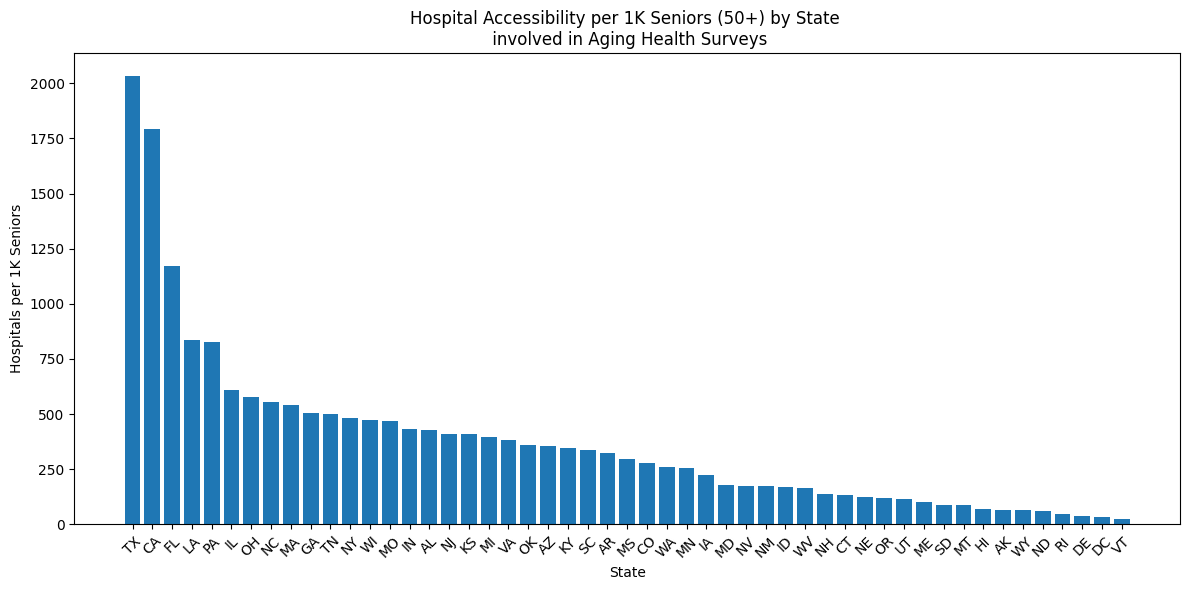

In [25]:
# 50+ Senior population
elderly_health = health[health['Age'].isin(['50-64 years','65 years or older'])]

elderly_related_question = [
    'Arthritis among older adults',
    'Severe joint pain among older adults with arthritis',
    'Functional difficulties associated with subjective cognitive decline or memory loss among older adults',
    'Subjective cognitive decline or memory loss among older adults'
]
# Only States and Special Districts
valid_codes = states.union(special)
elderly_health_filtered = elderly_health[elderly_health['StateCode'].isin(valid_codes)]

elderly_pop_50 = elderly_health_filtered[elderly_health_filtered['Topic'].isin(elderly_related_question)] \
    .groupby('StateCode').size()

# Elderly-focused hospital types
elderly_types = ['GENERAL ACUTE CARE','LONG TERM CARE','REHABILITATION','CHRONIC DISEASE']
hospital_elderly_filtered = hospital[hospital['Type'].isin(elderly_types)]
hospital_elderly_filtered = hospital_elderly_filtered[hospital_elderly_filtered['StateCode'].isin(valid_codes)]
hospital_elderly_count = hospital_elderly_filtered.groupby('StateCode').size()

# Hospitals per 1K Seniors
hospitals_per_senior = hospital_elderly_count / elderly_pop_50 * 1000
hospitals_per_senior_sorted = hospitals_per_senior.sort_values(ascending = False)

plt.figure(figsize = (12,6))
plt.bar(hospitals_per_senior_sorted.index, hospitals_per_senior_sorted.values)
plt.title('Hospital Accessibility per 1K Seniors (50+) by State \n involved in Aging Health Surveys')
plt.xlabel('State')
plt.ylabel('Hospitals per 1K Seniors')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

**This bar chart illustrates that:**
- Comparison between the number of Elderly-focused hospitals relative to the elderly (50+) population in each state.
- A higher value implies better accessibility, while a lower value suggests greater strain on limited healthcare infrastructure.

As shown in the chart, Texas has the highest accessibility due to its high number of Elderly-focused hospitals per population aged 50+. Then,

**Q2: Among the top 10 states, which demonstrate both high Long-term care hospital availability and high average nursing home ratings?**

(Here, we filtered only 65+ population and Long-term care hospitals because rating dataset represents the quality of nursing homes.)

In [26]:
# 65+ Elderly population
health_65 = health[health['Age'] == '65 years or older']

elderly_related_question = [
    'Arthritis among older adults',
    'Severe joint pain among older adults with arthritis',
    'Functional difficulties associated with subjective cognitive decline or memory loss among older adults',
    'Subjective cognitive decline or memory loss among older adults'
]

elderly_pop_65 = health_65[health_65['Topic'].isin(elderly_related_question)].groupby('StateCode').size()

# LTC hospitals only
ltc_hospitals = hospital[hospital['Type'] == 'LONG TERM CARE']
ltc_counts = ltc_hospitals.groupby('StateCode').size()

# Hospitals per 1K Elderly
hospitals_per_elderly = ltc_counts / elderly_pop_65 * 1000
top10 = hospitals_per_elderly.sort_values(ascending = False).head(10)

# Nursing Home Rating
rating_avg = rating.groupby('StateCode')['Overall'].mean()
merged = pd.DataFrame({
    'Hospitals per 1K Elderly': top10,
    'Avg Nursing Home Rating': rating_avg.reindex(top10.index)
})
print("Top 10 States by Long-Term Care Hospitals per 1K Elderly (65+):\n")
print(merged)

Top 10 States by Long-Term Care Hospitals per 1K Elderly (65+):

           Hospitals per 1K Elderly  Avg Nursing Home Rating
StateCode                                                   
TX                       636.363636                      2.8
LA                       230.158730                      2.3
OH                       202.312139                      3.1
FL                       188.034188                      3.1
PA                       154.929577                      3.0
MI                       134.020619                      3.1
IN                       112.781955                      3.1
GA                        81.761006                      2.6
TN                        78.947368                      2.8
OK                        78.014184                      2.6


When examining the number of long-term care (LTC) hospitals per 1K people aged 65+ and the average nursing home ratings for the top 10 states, Texas (TX) had the highest accessibility, followed by Louisiana (LA) and Ohio (OH).

While Texas leads in the sheer number of elderly-focused hospitals, accessibility alone does not guarantee better care. To examine whether quantity aligns with quality, we compared states’ long-term care hospital availability with their average nursing home ratings.

**Q3: Does higher accessibility to long-term care hospitals correspond to higher average nursing home quality across states?**

/tmp/ipython-input-225655670.py:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



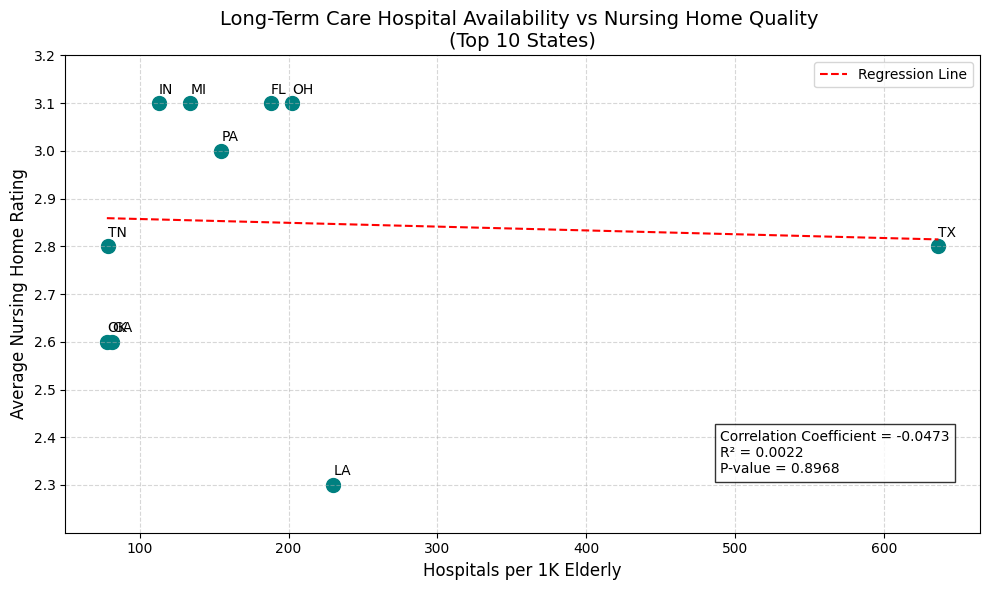

In [27]:
x = merged['Hospitals per 1K Elderly']
y = merged['Avg Nursing Home Rating']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Regression line
line_x = np.array([x.min(), x.max()])
line_y = slope * line_x + intercept

plt.figure(figsize = (10, 6))
plt.scatter(x, y, color = 'teal', s = 100)

for i, state in enumerate(merged.index):
    plt.text(x[i] + 0.05, y[i] + 0.02, state)

plt.plot(line_x, line_y, color = 'red', linestyle = '--', label = f'Regression Line')
plt.title('Long-Term Care Hospital Availability vs Nursing Home Quality \n(Top 10 States)', fontsize = 14)
plt.xlabel('Hospitals per 1K Elderly', fontsize = 12)
plt.ylabel('Average Nursing Home Rating', fontsize = 12)
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.legend()
plt.ylim(merged['Avg Nursing Home Rating'].min() - 0.1, merged['Avg Nursing Home Rating'].max() + 0.1)
plt.yticks(np.arange(2.3, 3.2, 0.1))
plt.tight_layout()

plt.text(merged['Hospitals per 1K Elderly'].max() * 0.77,
         merged['Avg Nursing Home Rating'].max() * 0.75,
         f'Correlation Coefficient = {r_value:.4f}\nR² = {r_value**2:.4f}\nP-value = {p_value:.4f}',
         fontsize = 10, bbox = dict(facecolor = 'white', alpha = 0.8))

plt.show()

**This regression scatter plot shows:**

* **Correlation Coefficient = -0.0473**: A weak negative linear relationship.
* **R² = 0.0022**: Little linear relationship, explaining only about 0.22% of the variance.
* **P-value = 0.8968 (> 0.05)**: Insufficient evidence to conclude a significant difference.

This suggests that there is virtually no linear relationship between **the higher accessibility and nursing home quality**. To complement this analysis, we also examined whether the total number of older adults in each state correlates with average nursing home quality.

**Q4: Does the size of the elderly population in a state influence the average nursing home quality, and how does it compare to the national average?**

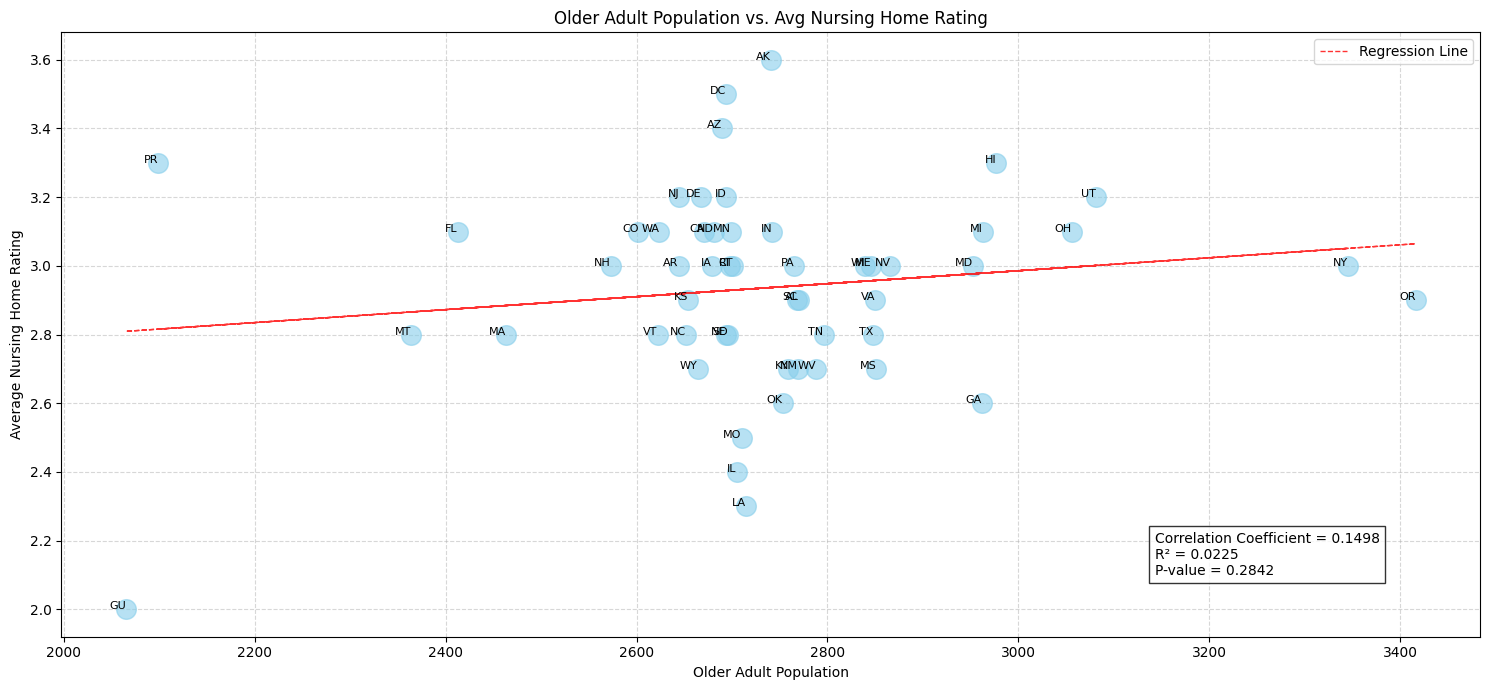

In [28]:
older_adult_health = health[health['Question'].str.contains('older adult', case = False, na = False)]
older_adult_health = older_adult_health[older_adult_health['Age'].isin(['65 years or older', '50-64 years'])]
older_adult_counts = older_adult_health.groupby('StateCode').size().reset_index(name = 'Older Adult Count')
avg_rating = rating[rating['StateCode'] != 'US'].groupby('StateCode')['Overall'].mean().reset_index(name = 'Avg Overall Rating')

merged = older_adult_counts[older_adult_counts['StateCode'] != 'US'].merge(avg_rating, on = 'StateCode', how = 'inner')

plt.figure(figsize = (15, 7))

# Scatter Plot
plt.scatter(merged['Older Adult Count'], merged['Avg Overall Rating'], color = 'skyblue', s = 200, alpha = 0.6, zorder = 2)

# Regression Line
z = np.polyfit(merged['Older Adult Count'], merged['Avg Overall Rating'], 1)
p = np.poly1d(z)
plt.plot(merged['Older Adult Count'], p(merged['Older Adult Count']), "r--", alpha = 0.8, linewidth = 1, label = 'Regression Line')

slope, intercept, r_value, p_value, std_err = linregress(merged['Older Adult Count'], merged['Avg Overall Rating'])
r_squared = r_value ** 2

plt.xlabel('Older Adult Population')
plt.ylabel('Average Nursing Home Rating')
plt.title('Older Adult Population vs. Avg Nursing Home Rating')
plt.legend()
plt.grid(True, linestyle = '--', alpha = 0.5)

for i, row in merged.iterrows():
    plt.annotate(row['StateCode'], (row['Older Adult Count'], row['Avg Overall Rating']), fontsize = 8, ha = 'right')

correlation = np.corrcoef(merged['Older Adult Count'], merged['Avg Overall Rating'])[0, 1]
plt.text(merged['Older Adult Count'].max() * 0.92,
         merged['Avg Overall Rating'].min() + 0.1,
         f'Correlation Coefficient = {correlation:.4f}\nR² = {r_squared:.4f}\nP-value = {p_value:.4f}',
         fontsize = 10, bbox = dict(facecolor = 'white', alpha = 0.8))

plt.tight_layout()
plt.show()

#### **This regression scatter plot shows:**

* **Correlation Coefficient = 0.1498**: A weak positive linear relationship.
* **R² = 0.0225**: Little linear relationship, explaining only about 2.25% of the variance.
* **P-value = 0.2842 (> 0.05)**: Insufficient evidence to conclude a significant difference.

This suggests that there is virtually no significant linear relationship between the size of the elderly population and the average quality of nursing homes. However, it reveals that **population size explains the variation of y about 10 times better than hospital accessibility**.

This time, we analyzed the impact of nursing home ratings on people's health.

**Q5: Does the quality of nursing homes (high vs. low rated states) actually translate into differences in older adults’ self-reported health and well-being?**

In [29]:
valid = states
filtered_rating = rating[rating['StateCode'].isin(valid)]

top_3_states = filtered_rating.sort_values(by = "Overall", ascending = False).head(3)['StateCode'].tolist()
bottom_3_states = filtered_rating.sort_values(by = "Overall", ascending = False).tail(3)['StateCode'].tolist()
selected_states = list(dict.fromkeys(top_3_states + bottom_3_states))
print(f'Top 3 States: {top_3_states}')
print(f'Bottom 3 States: {bottom_3_states}')

Top 3 States: ['AK', 'AZ', 'HI']
Bottom 3 States: ['MO', 'IL', 'LA']


As above, the top 3 states are AK, AZ, and HI, and the bottom 3 states are MO, IL, and LA.

To explore this, we divided health and well-being indicators into **good to excellent physical health** and **frequent mental distress** between the top-rated and bottom-rated states.

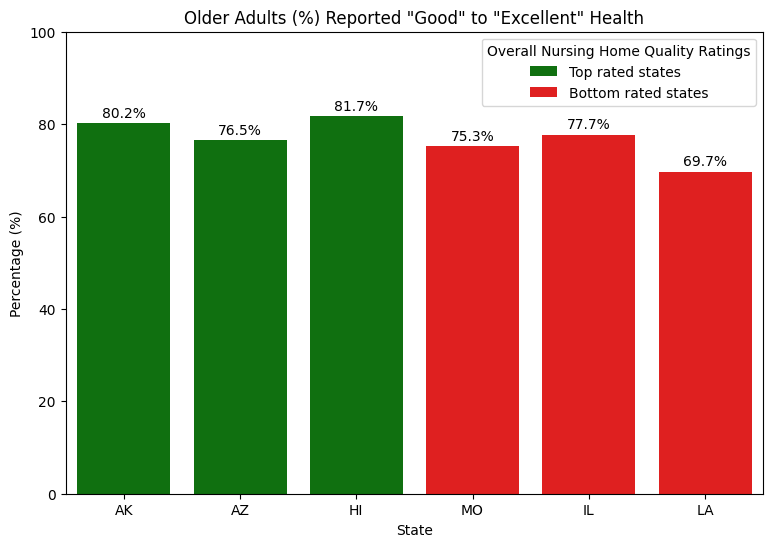

In [30]:
# Good to Excellent Physical Health
question_filter = 'Percentage of older adults who self-reported that their health is "good", "very good", or "excellent"'
health_filtered = health[
    (health["Question"] == question_filter) &
    (health["Age"].isin(['65 years or older', '50-64 years'])) &
    (health["Sex"].isna()) &
    (health["StateCode"].isin(selected_states))]

state_means = health_filtered.groupby("StateCode")['Data Value'].mean().reset_index()
state_means.rename(columns = {'Data Value': 'Percentage Health'}, inplace = True)

state_means['ColorGroup'] = state_means['StateCode'].apply(lambda x: 'Top rated states' if x in top_3_states else 'Bottom rated states')
state_means['States'] = pd.Categorical(state_means['StateCode'], categories = selected_states, ordered = True)

plt.figure(figsize = (9, 6))
ax = sns.barplot(x = 'States', y = 'Percentage Health', data = state_means,
            hue ='ColorGroup', palette = {'Top rated states': 'green', 'Bottom rated states': 'red'}, dodge = False)

plt.xlabel('State')
plt.ylabel('Percentage (%)')
plt.title('Older Adults (%) Reported "Good" to "Excellent" Health')
plt.ylim(0, 100)
plt.legend(title = "Overall Nursing Home Quality Ratings")

for container in ax.containers:
    ax.bar_label(container, fmt = '%.1f%%', label_type = 'edge', padding = 2)

plt.show()

**This bar chart illustrates that:**
- 76.5-81.7% of the states with high ratings (green) reported good to very good health.
- 69.7-77.7% of the states with low ratings (red) reported good to very good health.

This suggests that states with higher service ratings tend to have more positive perceptions of their own health among seniors.

Then,

**Q6: Does this pattern hold across broader regions beyond just the top and bottom states? Are there differences in the distribution of self-reported health among older adults across the US regions?**

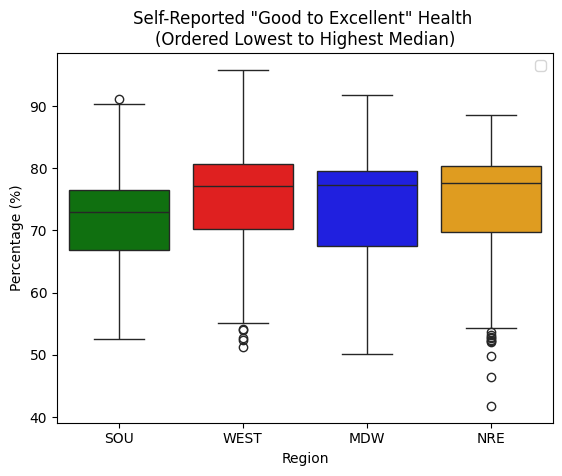

In [31]:
region_codes = list(regions.keys())
health_regions_only = health[health['StateCode'].apply(lambda x: any(x in states for states in regions.values()))]

color_map = {'MDW': 'blue', 'NRE': 'orange', 'SOU': 'green', 'WEST': 'red'}

question_health = 'Percentage of older adults who self-reported that their health is "good", "very good", or "excellent"'
health_physical = health[
    (health['StateCode'].isin(region_codes)) &
    (health['Question'] == question_health)
]
medians = health_physical.groupby('StateCode')['Data Value'].median().sort_values()
ordered_regions = medians.index.tolist()
sns.boxplot(
    data = health_physical,
    x = 'StateCode',
    y = 'Data Value',
    hue = 'StateCode',
    order = ordered_regions,
    palette = color_map,
    dodge = False
)
plt.title('Self-Reported "Good to Excellent" Health \n(Ordered Lowest to Highest Median)')
plt.xlabel('Region')
plt.ylabel('Percentage (%)')
plt.legend([])
plt.show()

**This boxplot illustrates that:**
* WEST and NRE have similar median values, but WEST's whiskers are higher.
* SOU region exhibits the lowest health distribution overall, while MDW is in the middle.

**Q7: What regions do the top 3 and bottom 3 states belong to?**

In [32]:
def get_region(state):
    for region, states_set in regions.items():
        if state in states_set:
            return region
    return "Unknown"

top3_df = pd.DataFrame({
    "State": top_3_states,
    "Region": [get_region(s) for s in top_3_states],
    "Group": "Top 3"
})

bottom3_df = pd.DataFrame({
    "State": bottom_3_states,
    "Region": [get_region(s) for s in bottom_3_states],
    "Group": "Bottom 3"
})
summary_df = pd.concat([top3_df, bottom3_df], ignore_index = True)
print(summary_df)

  State Region     Group
0    AK   WEST     Top 3
1    AZ   WEST     Top 3
2    HI   WEST     Top 3
3    MO    MDW  Bottom 3
4    IL    MDW  Bottom 3
5    LA    SOU  Bottom 3


The WEST region generally has particularly high self-reported health, consistent with previous observations that the top-rated states (AK, AZ, HI) are located in this region, as shown in the bar chart. The MDW and SOU regions, where the bottom-rated states (MO, IL, LA) are located, show relatively low positive health-reported distributions.

**Q8: How do nursing home service ratings relate to negative outcomes, such as frequent mental distress among older adults?**

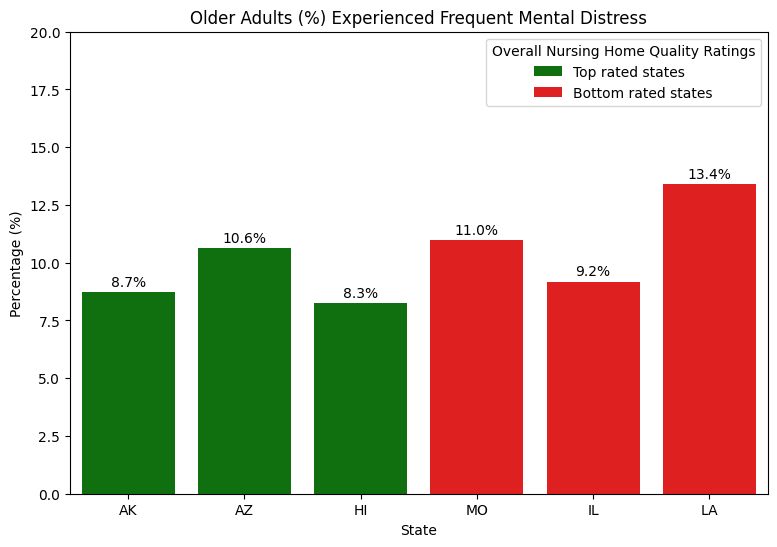

In [33]:
# Frequent Mental Distress
question_filter = "Percentage of older adults who are experiencing frequent mental distress"
distress_filtered = health[
    (health["StateCode"].isin(selected_states)) &
    (health["Question"] == question_filter) &
    (health["Age"].isin(['65 years or older', '50-64 years'])) &
    (health["Sex"].isna())
]

state_distress = distress_filtered.groupby("StateCode")['Data Value'].mean().reset_index()
state_distress.rename(columns = {'Data Value': 'Distress %'}, inplace = True)

state_distress['ColorGroup'] = state_distress['StateCode'].apply(lambda x: 'Top rated states' if x in top_3_states else 'Bottom rated states')
state_distress['States'] = pd.Categorical(state_distress['StateCode'], categories = selected_states, ordered = True)

plt.figure(figsize = (9, 6))
ax = sns.barplot(x = 'States', y = 'Distress %', data = state_distress,
    hue = 'ColorGroup', dodge = False, palette = {'Top rated states': 'green', 'Bottom rated states': 'red'}
)

plt.title("Older Adults (%) Experienced Frequent Mental Distress")
plt.xlabel("State")
plt.ylabel("Percentage (%)")
plt.ylim(0, 20)
plt.legend(title="Overall Nursing Home Quality Ratings")

for container in ax.containers:
    ax.bar_label(container, fmt = '%.1f%%', padding = 2)

plt.show()

**This bar chart illustrates that:**
- 8.3-10.6% of the states with high ratings (green) reported frequent mental distress.
- 9.2-13.4% of the states with low ratings (red) reported frequent mental distress.

This suggests that states with lower nursing home service ratings tend to have higher rates of mental stress among their seniors.

**Q9: Does this pattern hold across broader regions beyond just the top and bottom states?**

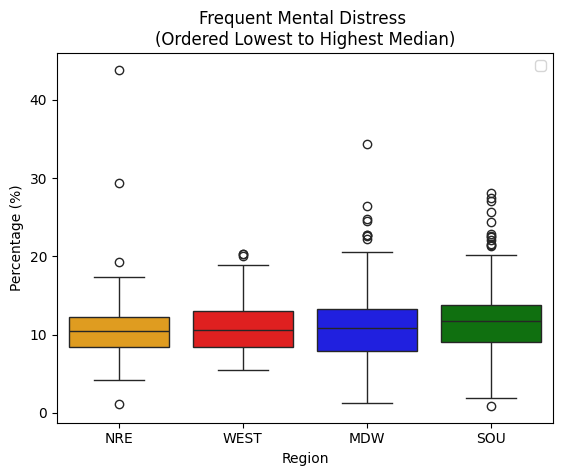

In [34]:
question_distress = 'Percentage of older adults who are experiencing frequent mental distress'
health_distress = health[
    (health['StateCode'].isin(region_codes)) &
    (health['Question'] == question_distress)
]
medians_distress = health_distress.groupby('StateCode')['Data Value'].median().sort_values()
ordered_regions_distress = medians_distress.index.tolist()
sns.boxplot(
    data = health_distress,
    x = 'StateCode',
    y = 'Data Value',
    hue = 'StateCode',
    order = ordered_regions_distress,
    palette = color_map,
    dodge = False
)
plt.title('Frequent Mental Distress \n(Ordered Lowest to Highest Median)')
plt.xlabel('Region')
plt.ylabel('Percentage (%)')
plt.legend([])
plt.show()

Here, states with higher ratings showed more positive assessments of their health among seniors, and states with lower ratings were associated with higher rates of mental stress.

IL appears to be an outlier, which is expected because it has a higher GDP and more progressive policies than MO or LA.

Ultimately, this confirms that **facility service ratings are not simply administrative scores, but are closely related to the actual health and mental quality of life of seniors**.
Therefore, policymakers and managers should **simultaneously consider quantitative expansion (the number of facilities) and qualitative management (improving evaluation and service quality)**.

**Q10: In what section did each state receive high/low rating scores?**

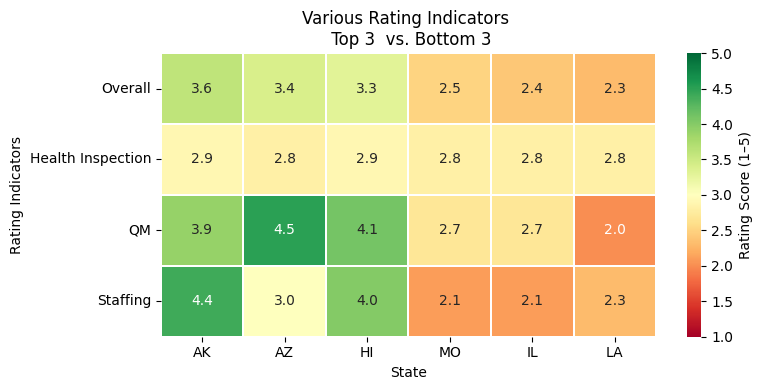

In [35]:
if 'State or Nation' in rating.columns:
    rating = rating.rename(columns = {'State or Nation': 'StateCode'})
rating['StateCode'] = rating['StateCode'].replace({'NATION': 'US'})
metric_map = {
    'Overall': "Overall",
    'Health Inspection': 'Health Inspection',
    'QM': 'QM',
    'Staffing': 'Staffing'
}
metrics_std = list(metric_map.values())
for orig, std in metric_map.items():
    rating[std] = pd.to_numeric(rating[orig], errors = 'coerce')
state_metric = rating.groupby('StateCode')[metrics_std].mean(numeric_only = True)
focus_states = top_3_states + bottom_3_states
focus_df = state_metric.reindex(focus_states)
focus_df = focus_df.dropna(axis = 0, how = 'all').dropna(axis = 1, how = 'all')

if not focus_df.empty:
    plt.figure(figsize = (8, 4))
    sns.heatmap(
        focus_df.T,
        cmap = 'RdYlGn',
        vmin = 1, vmax = 5,
        annot = True, fmt = '.1f',
        linewidths = 0.3, linecolor = 'white',
        cbar_kws = {'label': 'Rating Score (1–5)'}
    )
    plt.title('Various Rating Indicators \n Top 3  vs. Bottom 3')
    plt.xlabel('State')
    plt.ylabel('Rating Indicators')
    plt.tight_layout()
    plt.show()

**As shown in the heatmap chart above,**
* The most prominent **high** scores: **Staffing (4.4) in AK** and **Quality Measure (4.5) in AZ**.
* The most prominent **low** scores: **Staffing (2.1) in both MO and IL** and **Quality Measure (2.0) in LA**.

The overall ratings of the top three states and the bottom three states differ significantly. However, the Health Inspection ratings are similar across all six states. Therefore, we wanted to understand which factor, Quality Measure or Staffing, significantly influences these overall ratings.

**Q11: Between QM and Staffing, which factor has the greatest impact on your overall rating?**

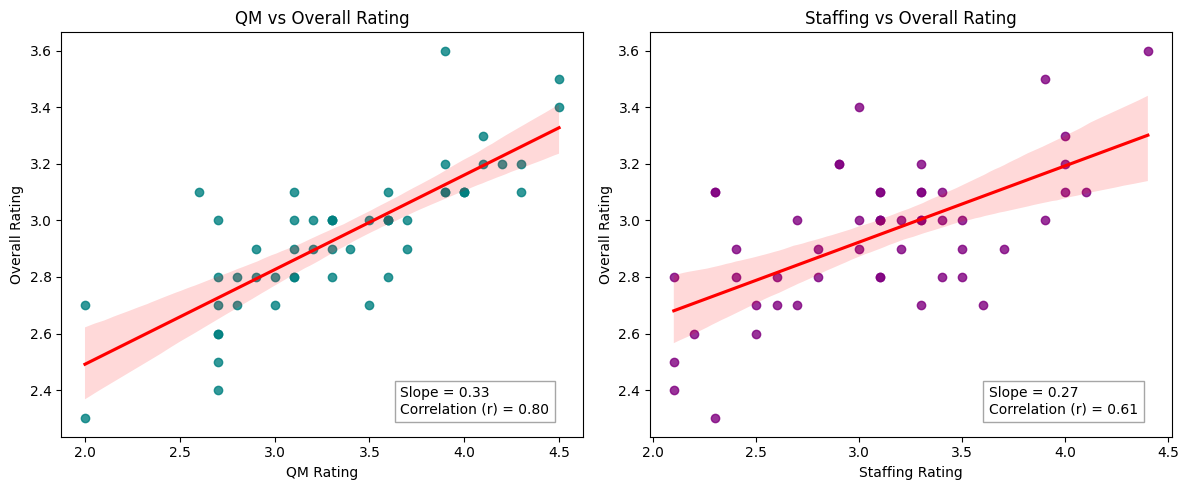

In [36]:
regression_df = state_metric[['Overall', 'QM', 'Staffing']].dropna()

# Regression: QM
qm_slope, qm_intercept = np.polyfit(regression_df['QM'], regression_df['Overall'], 1)
qm_corr = np.corrcoef(regression_df['QM'], regression_df['Overall'])[0, 1]

# Regression: Staffing
staff_slope, staff_intercept = np.polyfit(regression_df['Staffing'], regression_df['Overall'], 1)
staff_corr = np.corrcoef(regression_df['Staffing'], regression_df['Overall'])[0, 1]

plt.figure(figsize = (12, 5))

# Subplot: QM
plt.subplot(1, 2, 1)
sns.regplot(x = 'QM', y = 'Overall', data = regression_df, color = 'teal', line_kws = {'color': 'red'})
plt.title('QM vs Overall Rating')
plt.xlabel('QM Rating')
plt.ylabel('Overall Rating')
plt.text(
    0.65, 0.05,
    f"Slope = {qm_slope:.2f}\nCorrelation (r) = {qm_corr:.2f}",
    transform = plt.gca().transAxes,
    fontsize = 10,
    ha = 'left', va = 'bottom',
    bbox = dict(facecolor = 'white', alpha = 0.7, edgecolor = 'gray')
)

# Subplot: Staffing
plt.subplot(1, 2, 2)
sns.regplot(x = 'Staffing', y = 'Overall', data = regression_df, color = 'purple', line_kws = {'color': 'red'})
plt.title('Staffing vs Overall Rating')
plt.xlabel('Staffing Rating')
plt.ylabel('Overall Rating')
plt.text(
    0.65, 0.05,
    f"Slope = {staff_slope:.2f}\nCorrelation (r) = {staff_corr:.2f}",
    transform = plt.gca().transAxes,
    fontsize = 10,
    ha = 'left', va = 'bottom',
    bbox = dict(facecolor = 'white', alpha = 0.7, edgecolor = 'gray')
)

plt.tight_layout()
plt.show()

**These linear regression scatter plots suggest:**
* Higher QM ratings generally lead to higher overall ratings (slope = 0.33 & correlation coefficient = 0.80)
* Increase in the Staffing rating slightly increases the Overall Rating (slope =  0.27 & correlation coefficient = 0.61)

In conclusion, **QM appears to be the factor that has the greater impact on the Overall Rating**, and Staffing also contributes to some degree, but the impact is relatively weak.

Then,

**Q12: How well does this scatterplot model fit the dataset?**

In [37]:
# OLS Regression
X = regression_df[['QM', 'Staffing']]
X = sm.add_constant(X)
y = regression_df['Overall']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     245.6
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           2.90e-26
Time:                        14:47:12   Log-Likelihood:                 61.033
No. Observations:                  52   AIC:                            -116.1
Df Residuals:                      49   BIC:                            -110.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1897      0.081     14.766      0.0

**This Ordinary Least Squares (OLS) regression analysis shows:**
* **Consistency between the correlation and the regression**: The high R² of 0.909 indicates that the two variables together explain most of the overall variance.
* **QM dominance**: The t-value for QM (16.977) is higher than that for Staffing (12.206), and the coefficient is also large, indicating that QM is a more important factor in determining the overall rating.
* **Model reliability**: The high R², significant F-statistic, and residual diagnostics (normality satisfied, no autocorrelation) suggest that the model is reliable.

**<Brief Conclusion for Section 3.1>**

* While higher hospital access rates among older adults or larger populations do not necessarily correlate with higher nursing home ratings, population size is more significantly related to nursing home ratings than hospital access rates.
* States with positive nursing home ratings tend to report better health and less mental distress than states with negative ratings.
* QM is a significant factor influencing a nursing home's overall rating. Therefore, increasing QM by one point has a greater positive effect on the overall rating than increasing Staffing by one point.

### **3.2 Most Relevant Health Issues**

In this part, we examined the most relevant health issues of overall age population in the United States.

First, we categorized the values in Topic columns of the health dataset into four major categories:

* **Mental & Cognitive Health**
* **Physical Health / Medical Conditions**
* **Lifestyle & Preventive Health**
* **Functional Limitations & Caregiving**

In [38]:
topic_category = {
    # Mental & Cognitive Health
    'Lifetime diagnosis of depression': 'Mental & Cognitive Health',
    'Frequent mental distress': 'Mental & Cognitive Health',
    'Functional difficulties associated with subjective cognitive decline or memory loss among older adults': 'Mental & Cognitive Health',
    'Need assistance with day-to-day activities because of subjective cognitive decline or memory loss': 'Mental & Cognitive Health',
    'Subjective cognitive decline or memory loss among older adults': 'Mental & Cognitive Health',
    'Talked with health care professional about subjective cognitive decline or memory loss': 'Mental & Cognitive Health',

    # Physical Health / Medical Conditions
    'Arthritis among older adults': 'Physical Health / Medical Conditions',
    'Severe joint pain among older adults with arthritis': 'Physical Health / Medical Conditions',
    'High blood pressure ever': 'Physical Health / Medical Conditions',
    'Diabetes screening within past 3 years': 'Physical Health / Medical Conditions',
    'Colorectal cancer screening': 'Physical Health / Medical Conditions',
    'Mammogram within past 2 years': 'Physical Health / Medical Conditions',
    'Pap test within past 3 years': 'Physical Health / Medical Conditions',
    'Influenza vaccine within past year': 'Physical Health / Medical Conditions',
    'Ever had pneumococcal vaccine': 'Physical Health / Medical Conditions',
    'Cholesterol checked in past 5 years': 'Physical Health / Medical Conditions',
    'Up-to-date with recommended vaccines and screenings - Men': 'Physical Health / Medical Conditions',
    'Up-to-date with recommended vaccines and screenings - Women': 'Physical Health / Medical Conditions',
    'Fall with injury within last year': 'Physical Health / Medical Conditions',
    'Oral health: tooth retention': 'Physical Health / Medical Conditions',
    'Disability status, including sensory or mobility limitations': 'Physical Health / Medical Conditions',

    # Lifestyle & Preventive Health
    'Obesity': 'Lifestyle & Preventive Health',
    'Prevalence of sufficient sleep': 'Lifestyle & Preventive Health',
    'Eating 3 or more vegetables daily': 'Lifestyle & Preventive Health',
    'Eating 2 or more fruits daily': 'Lifestyle & Preventive Health',
    'Current smoking': 'Lifestyle & Preventive Health',
    'No leisure-time physical activity within past month': 'Lifestyle & Preventive Health',
    'Binge drinking within past 30 days': 'Lifestyle & Preventive Health',

    # Functional Limitations & Caregiving
    'Recent activity limitations in past month': 'Functional Limitations & Caregiving',
    'Duration of caregiving among older adults': 'Functional Limitations & Caregiving',
    'Intensity of caregiving among older adults': 'Functional Limitations & Caregiving',
    'Provide care for a friend or family member in past month': 'Functional Limitations & Caregiving',
    'Expect to provide care for someone in the next two years': 'Functional Limitations & Caregiving',
    'Provide care for someone with cognitive impairment within the past month': 'Functional Limitations & Caregiving'
}

# Add 'Category' Column on health Dataset
health['Category'] = health['Topic'].map(topic_category)
year_category_counts = health.groupby(['Year', 'Category']).size().reset_index(name='Count')

**Q13: Which category is the biggest problem across the United States?**

In [39]:
fig_bubble = px.scatter(
    year_category_counts,
    x = 'Year',
    y = 'Category',
    size = 'Count',
    color = 'Category',
    title = 'Yearly Frequency of Health Categories Across US',
    size_max = 50
)
fig_bubble.update_xaxes(dtick = 1)
fig_bubble.update_layout(width=1000,  height=600)
fig_bubble.show()

**This bubble chart suggests:**

* **Functional Limitations & Caregiving** and **Mental & Cognitive Health** showed slight declines in 2018.
* **Lifestyle & Preventive Health** is fairly consistent.
* **Physical Health/Medical Conditions** was the most prevalent health issue across all years.

Then,

**Q14: What are the most relevant health issues in each state?**

We only looked at the 50 states and the DC, excluding the US territories (PR, GU, MP, AS, VI) and the current independent state (PW) to see it by region on the next step.

In [40]:
top_issues = (health.groupby('StateCode').apply(lambda x: x.loc[x['Data Value'].idxmax()])['Topic'].reset_index(level = 0))

valid_states = states.union(special)
top_issues_filtered = (top_issues[top_issues['StateCode'].isin(valid_states)].reset_index(drop = True))


most_common_topic = top_issues_filtered['Topic'].value_counts().idxmax()
most_common_count = top_issues_filtered['Topic'].value_counts().max()

print(f"Most Relevant Health Issue Across All States: {most_common_topic}")
print(f"Number of Appearances: {most_common_count} among 50 States + DC")
print("\nMost Relevant Health Issues (50 States + DC):")
print(top_issues_filtered)

Most Relevant Health Issue Across All States: Cholesterol checked in past 5 years
Number of Appearances: 44 among 50 States + DC

Most Relevant Health Issues (50 States + DC):
   StateCode                                         Topic
0         AK           Cholesterol checked in past 5 years
1         AL     Taking medication for high blood pressure
2         AR           Cholesterol checked in past 5 years
3         AZ           Cholesterol checked in past 5 years
4         CA           Cholesterol checked in past 5 years
5         CO           Cholesterol checked in past 5 years
6         CT           Cholesterol checked in past 5 years
7         DC           Cholesterol checked in past 5 years
8         DE           Cholesterol checked in past 5 years
9         FL           Cholesterol checked in past 5 years
10        GA           Cholesterol checked in past 5 years
11        HI           Cholesterol checked in past 5 years
12        IA           Cholesterol checked in past 5 year

/tmp/ipython-input-974487011.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Clearly, "Cholesterol Checked in the Past 5 Years" was the most relevant topic in almost all states.

**Q15: Does this fall under the 'Physical Health/Medical Conditions' category?**

In [41]:
is_physical_health = topic_category.get(most_common_topic) == 'Physical Health / Medical Conditions'

print(f"Is 'most_common_topic' within 'Physical Health / Medical Conditions'? {is_physical_health}")

Is 'most_common_topic' within 'Physical Health / Medical Conditions'? True


It is true, so the health issue regarding 'Cholesterol Checked' is included in the 'Physical Health/Medical Conditions' category.

**Q16: How have Cholesterol Screening levels changed over time by region?**

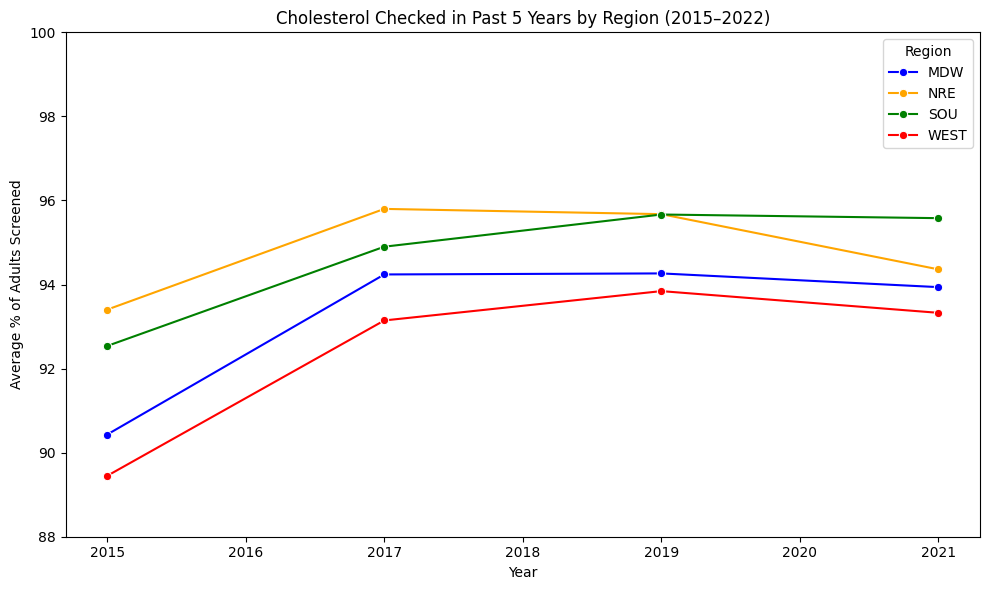

In [42]:
cholesterol = health[health['Topic'] == 'Cholesterol checked in past 5 years'].copy()

def get_region(code):
    for region, stateset in regions.items():
        if code in stateset:
            return region
    return None

cholesterol['Region'] = cholesterol['StateCode'].apply(get_region)
cholesterol_trends = cholesterol.groupby(['Year', 'Region'])['Data Value'].mean().reset_index()

# Hospitals that perform cholesterol tests
target_types = ['GENERAL ACUTE CARE', 'CRITICAL ACCESS', 'WOMEN']

fig, ax = plt.subplots(figsize = (10, 6))
region_palette = {'MDW': 'blue', 'NRE': 'orange', 'SOU': 'green', 'WEST': 'red'}
sns.lineplot(x = 'Year', y = 'Data Value', hue = 'Region', data = cholesterol_trends,
    marker = "o", ax = ax,palette = region_palette, markevery = 1)
ax.set_title("Cholesterol Checked in Past 5 Years by Region (2015–2022)")
ax.set_ylabel("Average % of Adults Screened")
ax.set_xlabel("Year")
ax.set_ylim(88, 100)
ax.legend(title = "Region")

plt.tight_layout()
plt.show()

This line graph illustrates that:
- How the **"Percentage of Adults Who Have Had a Cholesterol Test in the Past 5 Years"** has changed over time in each region (MDW, NRE, SOU, WEST).
- Overall, very high screening rates (over 90%) remain across all regions, suggesting that preventive health screenings are widespread across the region.

Then,

**Q17: How many hospitals that perform Cholesterol Screening are there in each region?**

Here, we only used General Acute Care, Critical Access, and Women's Hospitals from hospital types, likely to perform cholesterol screenings.

In [43]:
hospital_filtered = hospital[hospital['Type'].isin(target_types)].copy()
hospital_filtered['Region'] = hospital_filtered['StateCode'].apply(get_region)
hospital_counts = hospital_filtered.groupby('Region').size().reset_index(name = 'Hospital Count')
hospital_counts = hospital_counts.sort_values(by='Hospital Count', ascending=False)

print("Hospital Counts by Region:")
print(hospital_counts.to_string(index = False))

Hospital Counts by Region:
Region  Hospital Count
   SOU            2139
   MDW            1554
  WEST            1109
   NRE             686


Hospitals that perform cholesterol screening are most widely distributed in the SOU region, and we can see that NRE is less than 1/3 of SOU.

**Q18: How does the hospitals availability relate to cholesterol screening rates?**

In [44]:
cholesterol_region = (cholesterol.groupby('Region')['Data Value'].mean().reset_index().sort_values('Region'))
region_summary = pd.merge(hospital_counts, cholesterol_region, on = 'Region')

fig = go.Figure()

# Left Y-axis: # of Hospitals
fig.add_trace(go.Bar(
    x = region_summary['Region'],
    y = region_summary['Hospital Count'],
    name = 'Hospital Count',
    marker_color = 'rgba(31, 119, 180, 0.7)',
    yaxis = 'y1'
))

# Right Y-axis: Average Screening
fig.add_trace(go.Scatter(
    x = region_summary['Region'],
    y = region_summary['Data Value'],
    name = 'Average Cholesterol Screening (%)',
    mode = 'lines+markers',
    line = dict(color = 'crimson', width = 3),
    marker = dict(size = 8),
    yaxis = 'y2'
))

fig.update_layout(
    title = "Hospital Availability vs Cholesterol Screening Rates by Region (2015–2022)",
    xaxis = dict(title = "Region"),
    yaxis = dict(
        title = "Number of Hospitals",
        showgrid = False,
        side = 'left'
    ),
    yaxis2 = dict(
        title = "Average % Screened",
        overlaying = 'y',
        side = 'right',
        showgrid = False
    ),
    legend = dict(x = 0.25, y = 1.15, orientation = "h"),
    bargap = 0.4,
    template = 'plotly_white',
    width = 800,
    height = 500
)

fig.show()

**This combination chart suggests:**

* The SOU region has the largest number of hospitals, but its average screening rate remains in the middle.
* The NRE region has the highest average screening rate despite having the fewest hospitals.
* The MDW and WEST regions fall in between, with screening rates gradually decreasing as the number of hospitals decreases, before rising sharply again in the NRE.

This suggests that the **quantity** of healthcare infrastructure does not necessarily increase participation in preventive health screenings. Therefore, rather than simply implementing a nationwide policy, the U.S. government should prioritize **support in areas with low screening efficiency relative to the number of hospitals by integrating** and **analyzing regional healthcare infrastructure and health behavior data**.

More specifically,

**Q19: Which states have the highest and lowest cholesterol screening rates?**

In [45]:
cholesterol_state = (cholesterol.groupby('StateCode')['Data Value'].mean().reset_index())

fig = go.Figure()

# Choropleth: Avg % Cholesterol Screening
fig.add_trace(go.Choropleth(
    locations = cholesterol_state['StateCode'],
    z = cholesterol_state['Data Value'],
    locationmode = 'USA-states',
    colorscale = 'Inferno_r',
    colorbar_title = 'Avg % Screened',
    zmin = cholesterol_state['Data Value'].min(),
    zmax = cholesterol_state['Data Value'].max(),
))

fig.update_layout(
    title_text = 'Average % of Cholesterol Screening by State (2015–2022)',
    title_x = 0.5,
    geo_scope ='usa',
    geo = dict(
        projection_type = 'albers usa',
        showlakes = True,
        lakecolor = 'lightblue',
        center = dict(lon = -96, lat = 37.8)
    ),
    width = 800,
    height = 550,
    template = 'plotly_white'
)
fig.show()

**This Choropleth map shows:**

* Most of the eastern and southern regions, excluding the northeastern ME, have high average percentages of cholesterol screening.
* The Northwest, including AK and NM, has generally low average percentages.

So, this time, we wanted to learn about Mammogram Screening, which is not just **the most common test**, but is also **one of the most important prevention indicators**. Indeed, Mammogram Screening is a key prevention indicator for public health programs that directly impacts reducing female cancer mortality.

**Q20: Where does Mammogram Screening fit into these four categories?**

In [46]:
new_topic = 'Mammogram within past 2 years'
category = topic_category.get(new_topic)

print(f"The category for 'Mammogram within past 2 years' is: {category}")

The category for 'Mammogram within past 2 years' is: Physical Health / Medical Conditions


Mammogram Screening is also included in the Physical Health/Medical Conditions category. Therefore, it is clear that this is also a truly important indicator of health issues in the United States.

**Q21: How widespread is mammography screening, another key prevention indicator, in each state?**

In [47]:
mammogram_df = (
    health[health['Topic'] == new_topic]
    [['StateCode', 'Data Value']]
    .dropna()
    .groupby('StateCode', as_index = False)['Data Value']
    .mean()
    .rename(columns = {'Data Value': 'Avg % Screened'})
)

# Choropleth: Avg % Mammogram Screening
fig = px.choropleth(
    mammogram_df,
    locations = 'StateCode',
    locationmode = 'USA-states',
    color = 'Avg % Screened',
    color_continuous_scale = 'Inferno_r',
    range_color = (mammogram_df['Avg % Screened'].min(), mammogram_df['Avg % Screened'].max()),
    scope = 'usa',
    title = 'Average % of Mammogram Screening by State (2015–2022)'
)
fig.update_layout(
    geo = dict(bgcolor = 'rgba(0,0,0,0)'),
    title_x = 0.5,
    width = 800,
    height = 550
)
fig.show()

**This Choropleth map reveals:**
* Both Choropleth maps indicate higher screening rates in the eastern and southern regions of the United States.
* Conversely, screening rates are lower in the western and northwestern regions.

This overlap suggests common underlying factors influencing preventive health behaviors across states.

**1. Healthcare Access and Infrastructure**: States with higher rates in both screenings tend to have higher population densities, larger urban areas, and better access to healthcare facilities, facilitating regular screening.

**2. Socioeconomic and Demographic Factors**: Screening rates are correlated with income, education, and insurance coverage. Uninsured and underinsured individuals are less likely to undergo mammography, and similar patterns are observed for cholesterol screening. Racial and ethnic differences also play a role. These similarities suggest that broader socioeconomic inequalities are driving disparities in access to multiple preventive screenings, not just one.

**<Brief Conclusion for Section 3.2>**

* Physical Health/Medical Conditions emerged as the most prevalent health issue across all states, with Cholesterol and Mammogram Screening identified as key preventive indicators within this category.

* Although the South region has the greatest number of hospitals, it does not necessarily achieve higher cholesterol screening rates, suggesting that healthcare quantity alone does not ensure effective preventive care.

* Both Cholesterol and Mammogram screenings show similar regional patterns-higher in the eastern and southern states and lower in the western and northwestern regions-indicating shared structural or behavioral factors influencing preventive health behavior.

# **4. Conclusion**
Our analysis highlights several priorities for improving healthcare access and quality of care for older adults across the United States.

1. **States with fewer hospitals relative to their elderly population face accessibility challenges and require focused investment.**
  - **Business Action**: Expand healthcare capacity in underserved areas through new facilities, telehealth solutions, and regional partnerships.
  - **Risk**: Unmeasured socioeconomic factors may distort patterns.

2. **Higher nursing home ratings are associated with better self-reported health and less mental distress among older adults.**
  - **Business Action**: The government should focus on improving quality indicators (staffing ratios, laboratory performance) that directly impact health and patient satisfaction.
  - **Risk**: Additional consideration of socioeconomic factors is necessary, as outliers can limit the generalizability of findings.

3. **QM and Staffing determines overall performance.**
  - Regression results confirm that the QM and Staffing ratings explain most of the variation in overall scores.
  - **Business Action**: Improving workforce training, retention, and staffing ratios can directly enhance care outcomes.
  - **Risk**: Rather than focusing solely on these two, facilities with already high ratings should strive to be evaluated in other areas, while facilities with low ratings should invest heavily in QM.

4. **Regional disparities in cholesterol screening remain significant.**
  - **Business Action**: The government should focus its efforts on campaigns and infrastructure expansion in MDW and WEST, and on providing more medical facilities in NRE regions, to reduce regional disparities in testing participation rates for the most prevalent health issues, such as cholesterol.
  - **Risk**: Failure to account for regional policy differences.
  
5. **Strategic and policy implications.**
  - Policymakers and healthcare managers should pursue a dual approach that expands capacity while raising quality standards.
  - Monitoring both quantitative indicators such as hospital density and qualitative indicators such as staffing and quality measures will support equitable healthcare delivery and effective resource allocation.

### **Next Steps**
  - Collect additional metrics such as hospital staffing levels, per-facility budget, patient-to-bed ratio, and data on rural versus urban hospitals.
  - Expand the analysis to include social determinants of health (income, education, insurance coverage) to better account for outliers and uncover hidden causes of health disparities.
  - Pilot a predictive model to test how improvements in staffing quality affect future physical and mental health outcomes.

### **Challenges**
* The "Age" column in the health dataset is divided into "Overall," "50-64," and "65+," but it was difficult to clearly define "Overall." Therefore, in Section 3.1, we first looked at Senior (50-64 & 65+), and then examined Elderly (65+) in more detail. Furthermore, in Section 3.2, we conducted a comprehensive analysis including the entire US population (Overall, 50-64, and 65+).
* String values in columns like "Question" in the health dataset or "Type" in the hospital dataset often consisted of long sentences, making it difficult to distinguish and extract them. Frequently using unique allowed us to check code errors frequently and avoid code errors. Based on key data and social issues, we focused on extracting only the most important indicators.

### **References**
- [Intro-to-Data-Analytics by Mohammad Soltanieh](http://localhost:8888/notebooks/Downloads/780/B07-Analyzing-Key-Factors-For-Customer-Satisfaction-In-The-Airline-Industry.ipynb)
- [DataCamp](https://app.datacamp.com/learn/assignments)
- [Previous Project](http://localhost:8888/notebooks/Downloads/780/B07-Analyzing-Key-Factors-For-Customer-Satisfaction-In-The-Airline-Industry.ipynb)
- [Alzheimer’s Disease and Healthy Aging Data](https://data.cdc.gov/Healthy-Aging/Alzheimer-s-Disease-and-Healthy-Aging-Data/hfr9-rurv/about_data)
- [USA Hospital](https://www.kaggle.com/datasets/carlosaguayo/usa-hospitals)
- [State US Averages](https://data.cms.gov/provider-data/dataset/xcdc-v8bm)
- [Python Color Palette](https://matplotlib.org/stable/gallery/color/named_colors.html)
- [USA Facts - GDP of Louisiana](https://usafacts.org/answers/what-is-the-gross-domestic-product-gdp/state/louisiana/)
- [USA Facts - GDP of Illinois](https://usafacts.org/answers/what-is-the-gross-domestic-product-gdp/state/illinois/)
- [USA Facts - GDP of Missouri](https://usafacts.org/answers/what-is-the-gross-domestic-product-gdp/state/missouri/)
- [How OLS Regression Works](https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-statistics/how-ols-regression-works.htm)
- [Create and Use A Choropleth Map](https://doc.arcgis.com/en/insights/latest/create/choropleth-maps.htm)
- [Facts About Mammograms](https://www.cdc.gov/radiation-health/data-research/facts-stats/mammograms.html)

### **Generative AI Disclosure**
In this project, we used generative AI tools in the following parts:
- Code Review and Debugging: We used Grok to help us create the classify_codes function, which divides state codes, and to generate code that automatically reflects these derived states, eliminating the need for hardcoding them.
- Visualization: We used Grok to help us add elements like positioning and formatting.
- Proofreading and Grammar Checks: We used ChatGPT to synthesize the summaries of each output and write a clean executive summary. Additionally, we used Grammarly to correct spelling and sentence structure.